<a href="https://colab.research.google.com/github/Juancard/multi-label-classification-on-data-streamings/blob/master/mll_enron_clasificaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-multilearn
!pip install liac-arff

In [ ]:
%matplotlib inline
from skmultilearn.dataset import load_dataset
import numpy as np
import pandas as pd

# Multi-label - Batch

## EDA

In [ ]:
_, _, feature_names, label_names = load_dataset('enron', 'undivided')

enron:undivided - exists, not redownloading


In [ ]:
label_names[:10], "---", feature_names[-10:]

([('A.A8', ['0', '1']),
  ('C.C9', ['0', '1']),
  ('B.B12', ['0', '1']),
  ('C.C11', ['0', '1']),
  ('C.C5', ['0', '1']),
  ('C.C7', ['0', '1']),
  ('B.B2', ['0', '1']),
  ('B.B3', ['0', '1']),
  ('D.D16', ['0', '1']),
  ('A.A7', ['0', '1'])],
 '---',
 [('workers', ['0', '1']),
  ('working', ['0', '1']),
  ('world', ['0', '1']),
  ('writer', ['0', '1']),
  ('writers', ['0', '1']),
  ('www', ['0', '1']),
  ('year', ['0', '1']),
  ('years', ['0', '1']),
  ('yesterday', ['0', '1']),
  ('york', ['0', '1'])])

## Problem Transformation - Binary Relevance


In [ ]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.ensemble import RandomForestClassifier
import time

In [ ]:
x_train, y_train, _, _ = load_dataset('enron', 'train')
x_test, y_test, _, _ = load_dataset('enron', 'test')


enron:train - exists, not redownloading
enron:test - exists, not redownloading


In [ ]:
start=time.time()
classifier = BinaryRelevance(
    classifier = RandomForestClassifier(),
    require_dense = [False, True]
)

classifier.fit(x_train, y_train)

print('training time taken: ',round(time.time()-start,0),'seconds')

training time taken:  21.0 seconds


In [ ]:
start=time.time()
y_hat=classifier.predict(x_test)
print('prediction time taken: ',round(time.time()-start,0),'seconds')

prediction time taken:  2.0 seconds


In [ ]:
import sklearn.metrics as metrics
def ml_accuracy(y_test, y_hat):
  def accuracy(x): 
    return 1 - np.mean(y_test.T[x] != y_hat.T[x])  
  return [accuracy(i) for i in range(y_test.shape[1])]

br_acc=ml_accuracy(y_test, y_hat)
br_f1=metrics.f1_score(y_test, y_hat, average='micro')
br_hamm=metrics.hamming_loss(y_test,y_hat)
print('Binary Relevance Accuracy (all):',br_acc)
print('Binary Relevance Accuracy (mean):',round(np.mean(br_acc),3))
print('Binary Relevance F1-score:',round(br_f1,3))
print('Binary Relevance Hamming Loss:',round(br_hamm,3))

Binary Relevance Accuracy (all): [0.9844559585492227, 0.9620034542314335, 0.9965457685664939, 0.9775474956822107, 0.9378238341968912, 0.9585492227979274, 0.8048359240069087, 0.9758203799654577, 0.9948186528497409, 0.9810017271157168, 0.9965457685664939, 0.8048359240069087, 0.917098445595855, 0.9032815198618308, 0.7426597582037999, 0.9740932642487047, 0.9948186528497409, 0.9827288428324698, 0.9723661485319517, 0.9879101899827288, 0.9291882556131261, 0.8946459412780657, 0.9810017271157168, 0.9585492227979274, 0.9550949913644214, 0.7651122625215893, 0.9913644214162349, 0.9930915371329879, 0.9861830742659758, 0.9827288428324698, 0.998272884283247, 0.9568221070811744, 0.9948186528497409, 0.9844559585492227, 0.9844559585492227, 0.9930915371329879, 0.9948186528497409, 0.9723661485319517, 0.9896373056994818, 0.8877374784110537, 0.9930915371329879, 0.9810017271157168, 0.9775474956822107, 0.9585492227979274, 0.913644214162349, 0.998272884283247, 0.8290155440414511, 0.998272884283247, 0.989637305

## Problem Transformation - Classifier Chains

In [ ]:
from skmultilearn.problem_transform import ClassifierChain

In [ ]:
classifier = ClassifierChain(
    classifier = RandomForestClassifier(),
    require_dense = [False, True],
    order=[i for i in range(len(label_names))]
)
start=time.time()
classifier.fit(x_train,y_train)

print('training time taken: ',round(time.time()-start,0),'seconds')

training time taken:  19.0 seconds


In [ ]:
start=time.time()
y_hat=classifier.predict(x_test)
print('prediction time taken: ',round(time.time()-start,0),'seconds')

prediction time taken:  1.0 seconds


In [ ]:
br_acc=ml_accuracy(y_test, y_hat)
cc_f1=metrics.f1_score(y_test, y_hat, average='micro')
cc_hamm=metrics.hamming_loss(y_test,y_hat)
print('Binary Relevance Accuracy (all):',br_acc)
print('Binary Relevance Accuracy (mean):',round(np.mean(br_acc),3))
print('Classifier Chain F1-score:',round(cc_f1,3))
print('Classifier Chain Hamming Loss:',round(cc_hamm,3))

Binary Relevance Accuracy (all): [0.9844559585492227, 0.9620034542314335, 0.9965457685664939, 0.9775474956822107, 0.9378238341968912, 0.9585492227979274, 0.8048359240069087, 0.9758203799654577, 0.9948186528497409, 0.9810017271157168, 0.9965457685664939, 0.8048359240069087, 0.917098445595855, 0.9032815198618308, 0.7426597582037999, 0.9740932642487047, 0.9948186528497409, 0.9827288428324698, 0.9723661485319517, 0.9879101899827288, 0.9291882556131261, 0.8946459412780657, 0.9810017271157168, 0.9585492227979274, 0.9550949913644214, 0.7651122625215893, 0.9913644214162349, 0.9930915371329879, 0.9861830742659758, 0.9827288428324698, 0.998272884283247, 0.9568221070811744, 0.9948186528497409, 0.9844559585492227, 0.9844559585492227, 0.9930915371329879, 0.9948186528497409, 0.9723661485319517, 0.9896373056994818, 0.8877374784110537, 0.9930915371329879, 0.9810017271157168, 0.9775474956822107, 0.9585492227979274, 0.913644214162349, 0.998272884283247, 0.8290155440414511, 0.998272884283247, 0.989637305

# Multi-label - Streaming

In [7]:
!pip install scikit-multiflow scikit-multilearn liac-arff

  Created wheel for liac-arff: filename=liac_arff-2.4.0-cp36-none-any.whl size=13335 sha256=e8456375d523a0b16f6aea5cbf2ad938d21d75f5516e9a64df78828bc7e9eaae
  Stored in directory: /root/.cache/pip/wheels/d1/6a/e7/529dc54d76ecede4346164a09ae3168df358945612710f5203
Successfully built liac-arff


In [8]:
from skmultiflow.meta.multi_output_learner import MultiOutputLearner
from skmultiflow.core.pipeline import Pipeline
from skmultiflow.data.data_stream import DataStream
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model.perceptron import Perceptron
from skmultilearn.dataset import load_dataset
from skmultiflow.evaluation.evaluate_prequential import EvaluatePrequential
import numpy as np

In [9]:
X_stream, y_stream, feature_names, label_names = load_dataset('enron', 'undivided')
enron_stream = DataStream(data=X_stream.todense(), y=y_stream.todense())
enron_stream.prepare_for_use()

enron:undivided - does not exists downloading
Downloaded enron-undivided


/usr/local/lib/python3.6/dist-packages/skmultiflow/data/base_stream.py:194: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  category=FutureWarning)


In [10]:
X_stream, y_stream

(<1702x1001 sparse matrix of type '<class 'numpy.float64'>'
 	with 143090 stored elements in List of Lists format>,
 <1702x53 sparse matrix of type '<class 'numpy.int64'>'
 	with 5750 stored elements in List of Lists format>)

In [11]:
classifier = MultiOutputLearner(
    Perceptron()
)
enron_pipe = Pipeline([('classifier', classifier)])

### Sin modificar el dataset lanza error

In [12]:
%matplotlib inline

# Plotting
import matplotlib.pyplot as plt

evaluator = EvaluatePrequential(
    show_plot=True, 
    pretrain_size=100, 
    max_samples=500000,
    metrics=["hamming_score", "hamming_loss"]
)
evaluator.evaluate(stream=enron_stream, model=enron_pipe)

Prequential Evaluation
Evaluating 53 target(s).
Pre-training on 100 sample(s).


ValueError: ignored

Parece tener que ver con que el modelo necesita un ejemplo de todas las clases para poder pre-entrenar. En la celda se muestra que no todas las labels tienen todas sus clases en las primeros 100 instancias del dataset.

### Ordena dataset
A continuación se ordena el dataset de manera tal que haya un ejemplo de cada clase y label en la menor cantidad de filas posibles.

In [13]:
def unique_classes_per_label(a):
    b = np.sort(a,axis=0)
    return (b[1:] != b[:-1]).sum(axis=0)+1

unique_classes_per_label(y_stream.todense()[0:99])

matrix([[2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2,
         2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1,
         1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1]])

In [14]:
idx_per_label = []
for label in range(0, enron_stream.y.shape[1]):
    i = 0
    for row in enron_stream.y:
        if row[label] == 1 and i not in idx_per_label:
            idx_per_label.append(i)
            break
        i += 1

test_ok = True
for i in range(0, enron_stream.y.shape[1]):
    test_ok &= enron_stream.y[idx_per_label[i]][i] == 1
print("idx_per_label se cargó correctamente") if test_ok else print("Falló el test")

idx_per_label se cargó correctamente


In [15]:
y_sorted = np.append(
    enron_stream.y[idx_per_label], 
    enron_stream.y[ 
        [i for i in range(0,len(enron_stream.y)) if i not in idx_per_label] 
    ],
    axis=0
)
y_sorted

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
unique_classes_per_label(y_sorted[0:99])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
X_sorted = np.append(
    enron_stream.X[idx_per_label], 
    enron_stream.X[ 
        [i for i in range(0,len(enron_stream.X)) if i not in idx_per_label] 
    ],
    axis=0
)
enron_stream.X, enron_stream.X.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 1., 1., 0.]]), (1702, 1001))

### Con el dataset ordenado el modelo se ejecuta correctamente

/usr/local/lib/python3.6/dist-packages/skmultiflow/data/base_stream.py:194: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  category=FutureWarning)


Prequential Evaluation
Evaluating 53 target(s).
Pre-training on 100 sample(s).
Evaluating...
 ##------------------ [10%] [2.55s]

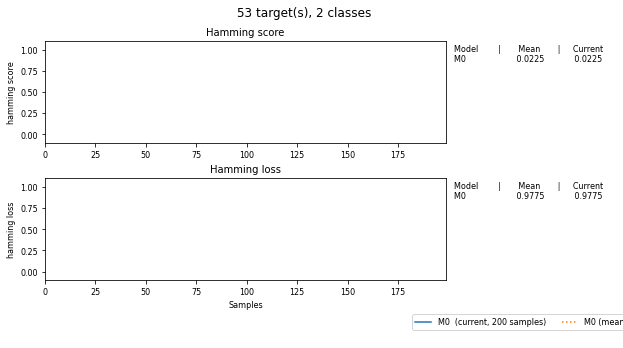

 ####---------------- [20%] [8.77s]

<Figure size 432x288 with 0 Axes>

 #######------------- [35%] [17.68s]

<Figure size 432x288 with 0 Axes>

 #########----------- [45%] [23.59s]

<Figure size 432x288 with 0 Axes>

 ###########--------- [55%] [29.45s]

<Figure size 432x288 with 0 Axes>

 ##############------ [70%] [38.23s]

<Figure size 432x288 with 0 Axes>

 ################---- [80%] [44.04s]

<Figure size 432x288 with 0 Axes>

 ##################-- [90%] [49.89s]

<Figure size 432x288 with 0 Axes>

 #################### [100%] [55.78s]


<Figure size 432x288 with 0 Axes>

Processed samples: 1702
Mean performance:
M0 - Hamming score: 0.0318
M0 - Hamming loss : 0.9682


[Pipeline(steps=[('classifier',
                  MultiOutputLearner(base_estimator=Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
            fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
            penalty=None, random_state=0, shuffle=True, tol=0.001,
            validation_fraction=0.1, verbose=0, warm_start=False)))])]

In [18]:
enron_stream = DataStream(data=X_sorted, y=y_sorted)
enron_stream.prepare_for_use()
classifier = MultiOutputLearner(
    Perceptron()
)
enron_pipe = Pipeline([('classifier', classifier)])
evaluator = EvaluatePrequential(
    show_plot=True, 
    pretrain_size=100, 
    max_samples=500000,
    metrics=["hamming_score", "hamming_loss"]
)
evaluator.evaluate(stream=enron_stream, model=enron_pipe)